In [261]:
#import packages
import numpy as np #for array and matrices
import pandas as pd #for data manipulation and analysis
from sklearn import preprocessing #for from sklearn import preprocessing 
from sklearn.model_selection  import train_test_split #for split the data into training and test
import matplotlib.pyplot as plt #plotting library
import seaborn as sns #visulization library
from collections import Counter #keep track of values
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score #for confusion matrix
import warnings
warnings.filterwarnings("ignore") #to ignore all the warnings

In [262]:
#load the dataset
#read_csv is from pandas and it is use for loading the data
m_health = pd.read_csv('D:\\Semester 3\\healthcare Analytics\\project\\survey.csv')

# Data Cleaning
 - here, we are cleaning the data only for `analysis` and `prediction model building`
 - For better understanding of cleaning the data check another file `Data_Cleaning.ipynb`

#### WE USE THIS THESE CODES FOR FINDING INFORMATION ABOUT DATA
- ###### it gives information about rows and column with non-null values so, we can find how munch null values we have in particuler columns.
 - m_health.info() 
- ###### here, we are finding unique values for age so, we can remove unnecessary values which dosen't make sence in data
 - age_u = m_health['Age'].unique()
 - age_u.sort()
 - age_u
- ###### here, we are finding unique values for age so, we can remove unnecessary values which dosen't make sence in data
 - gender_u = m_health['Gender'].unique()
 - gender_u.sort()
 - gender_u

In [263]:
#drop rows which has unnessecery values in age column
#here, we are calling age column from m_health data where we are removing row where we find that unnessecery value in age column.
m_health = m_health[m_health.Age != -1726]
m_health = m_health[m_health.Age != -29]
m_health = m_health[m_health.Age != -1]
m_health = m_health[m_health.Age != 329]
m_health = m_health[m_health.Age != 99999999999]
m_health = m_health[m_health.Age != 5]
m_health = m_health[m_health.Age != 8]
m_health = m_health[m_health.Age != 11]

#replace the values for gender
#here, we are calling Gender column from m_health data where we are replacing some values which are not meaningful to meaningful
#values and we are not removing any of the value from this column.
#we try to find out meaning of each values which are not relevent to data and replace with meaningful values.
#replace is used for changing old values to new values in dataframes
m_health['Gender'] = m_health['Gender'].replace(['Cis Male', 'Cis Man','Guy (-ish) ^_^',
                                                 'M', 'Mail', 'Make', 'Mal', 'Male', 'Male ',
                                                 'Male (CIS)', 'Male-ish', 'Malr', 'Man','cis male',
                                                 'm', 'maile', 'male','msle'], "M")

m_health['Gender'] = m_health['Gender'].replace(['Cis Female','F', 'Femake', 'Female', 'Female ',
                                                 'Female (cis)','Woman','cis-female/femme', 'f',
                                                 'femail', 'female', 'woman'], "F")

m_health['Gender'] = m_health['Gender'].replace(['A little about you', 'Agender', 'Androgyne',
                                                 'Enby','Female (trans)', 'Genderqueer','Nah', 'Neuter', 'Trans woman',
                                                 'Trans-female','fluid','male leaning androgynous','non-binary',
                                                 'ostensibly male, unsure what that really means', 'queer',
                                                 'queer/she/they', 'something kinda male?'], "O")

#here, we are droping three columns because commnets and state these two columns has more missing values and Timestamp has
#time and date which has around 3 month data so, we remove that also.
m_health = m_health.drop(['comments', 'state', 'Timestamp'], axis =1)

#Cleaning NaN
#Assign default values for each data type
#when there is integer column in data which has missing value then it put 0 in that missing value.
#if there is string column in data which has missing value then it put 'NaN' in that missing value.
int = 0 #default value for integers
string = 'NaN' #default values for string

#Create lists by data type
intFeatures = ['Age'] #integer features
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help'] #string features

#for loop which fills null values according to integer or string and if get any errors in columns then it gives error statement.
for feature in m_health:
    if feature in intFeatures:
        m_health[feature] = m_health[feature].fillna(int)
    elif feature in stringFeatures:
        m_health[feature] = m_health[feature].fillna(string)
    else:
        print('Error: Feature %s not recognized.' % feature)

In [264]:
#Encoding data
#here, we are using label encoder to encode data
labelDict = {} #array named labelDict which we use as Dictionary
for feature in m_health:
    le = preprocessing.LabelEncoder() #labelEncoder
    le.fit(m_health[feature]) #fit the labelEncoder
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) #original class and transform class
    m_health[feature] = le.transform(m_health[feature]) #transform data with all the features
    # Get labels
    labelKey = 'label_' + feature #labelKey which has label and feature names
    labelValue = [*le_name_mapping] #labelValue which has orinal class and transform class
    labelDict[labelKey] =labelValue #lebel dictonary
    
for key, value in labelDict.items(): #value which we transformed in labels except Age because it's already in numbers
    print(key, value)
    
m_health.to_csv('D:\\Semester 3\\healthcare Analytics\\project\\m_health.csv') #save data in .csv for future uses

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['F', 'M', 'O']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay']
label_self_employed ['NaN', 'No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['NaN', 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500'

# Analysis of Data

In [265]:
#load the dataset
#read_csv is from pandas and it is use for loading the data
m_health_all = pd.read_csv('D:\\Semester 3\\healthcare Analytics\\project\\survey.csv')

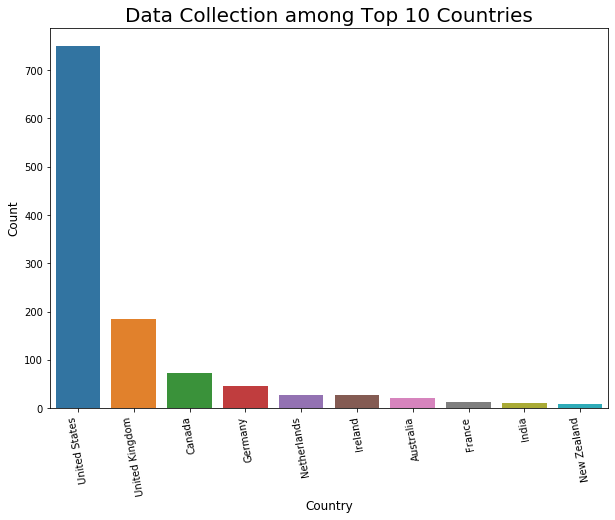

In [266]:
#where we get the data
country_count = Counter(m_health_all['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(10,7))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Data Collection among Top 10 Countries', size=20)
plt.xlabel('Country', size = 12)
plt.ylabel('Count', size = 12)
ticks = plt.setp(ax.get_xticklabels(),rotation=100,size =10)

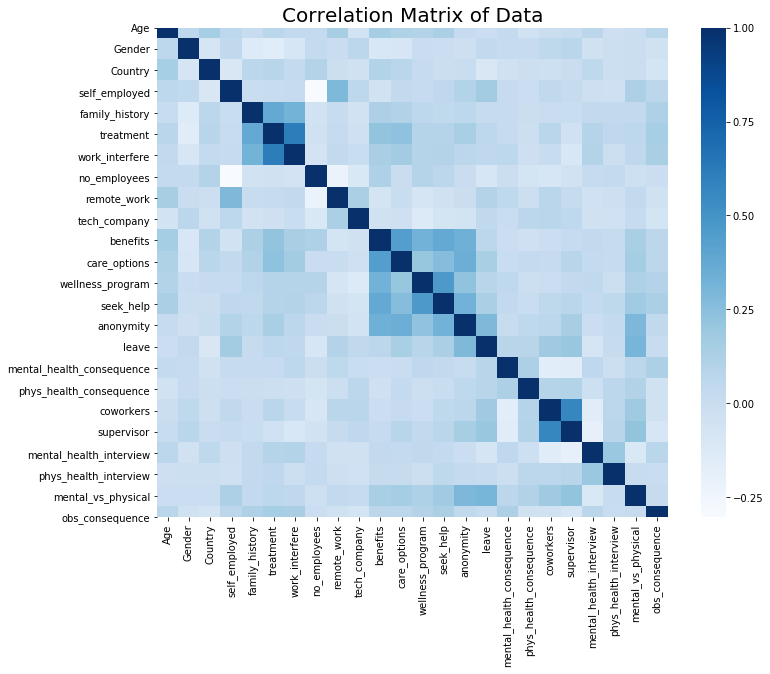

In [267]:
#correlation within the Data
corrmat = m_health.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, cmap='Blues')
plt.title('Correlation Matrix of Data', size = 20)
plt.show()

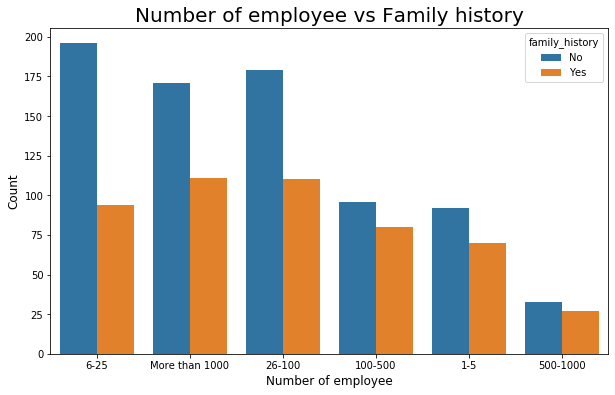

In [268]:
#Number of employees which has family history of mental illness
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(data=m_health_all,x = 'no_employees',hue= 'family_history',ax=ax)
plt.title('Number of employee vs Family history', size =20)
plt.xlabel('Number of employee', size = 12)
plt.ylabel('Count', size = 12)
ticks = plt.setp(ax.get_xticklabels(),size =10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AA17D8B88>,
      dtype=object)

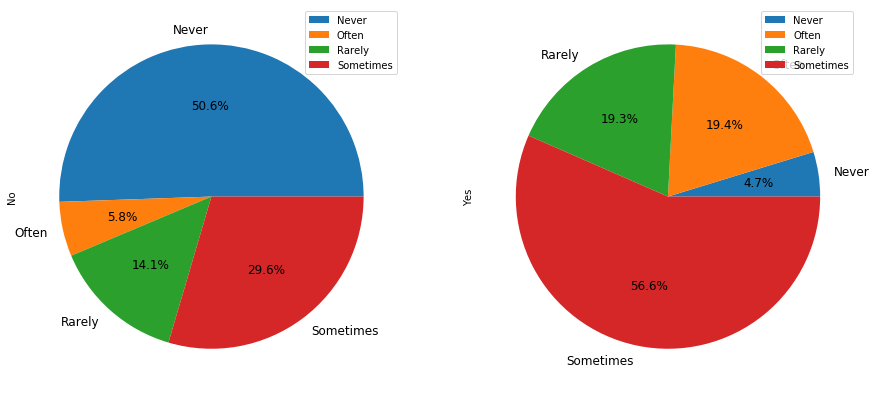

In [269]:
#how mental health effect on work and did they get treatment or not
fig,ax = plt.subplots(figsize=(15,15))
wt= m_health_all.groupby(['work_interfere', 'treatment']).treatment.count().unstack()
wt.plot(kind='pie',ax=ax,subplots=True, fontsize=12,autopct='%1.1f%%')

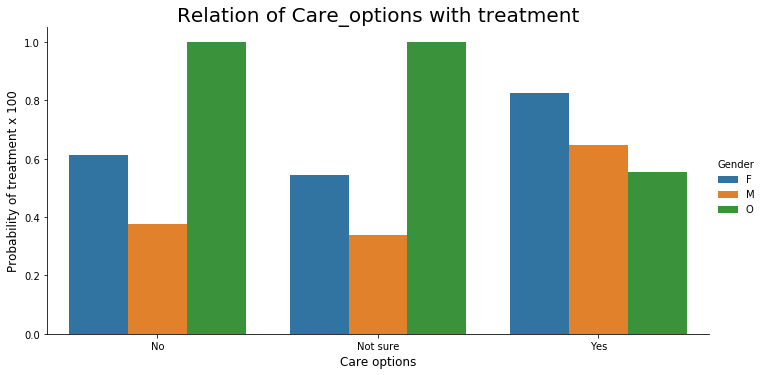

In [271]:
#Do employees know about care options and did they use in their treatment if they had
labels = labelDict['label_care_options']
g = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=m_health, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(labels)
plt.title('Relation of Care_options with treatment',size= 20)
plt.ylabel('Probability of treatment x 100',size=12)
plt.xlabel('Care options',size=12)
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)